In [120]:
import pandas as pd
df = pd.read_csv('athletes.csv')

In [121]:
df['medals won'] = df['gold'] + df['silver'] + df['bronze']
del df['gold']
del df['silver']
del df['bronze']


In [122]:
df['height'] = df['height'] * 3.28084

In [123]:
df['weight'] = df['weight'] * 2.20462

In [124]:
del df['id']
del df['name']
del df['nationality']
del df['info']
del df['date_of_birth']

In [125]:
df = df.dropna()

In [126]:
df.head()

,sex,height,weight,sport,medals won
0,male,5.643045,141.09568,athletics,0
1,female,5.511811,123.45872,fencing,0
2,male,6.496063,174.16498,athletics,1
3,male,6.003937,176.36960,taekwondo,0
4,male,5.938320,156.52802,cycling,0


In [127]:
data_new = pd.get_dummies(df.ix[:,0])
data_new.head()

/Users/amygeraghty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [128]:
data_final = pd.concat([data_new, df.ix[:,1:5]],axis=1)
data_final.head()

,female,male,height,weight,sport,medals won
0,0,1,5.643045,141.09568,athletics,0
1,1,0,5.511811,123.45872,fencing,0
2,0,1,6.496063,174.16498,athletics,1
3,0,1,6.003937,176.36960,taekwondo,0
4,0,1,5.938320,156.52802,cycling,0


In [129]:
del data_final['medals won']
del data_final['sport']

In [130]:
data_final = data_final.drop('female', axis =1)



In [131]:
y = data_final['male']
y.head(15)

0     1
1     0
2     1
3     1
4     1
5     1
6     1
7     1
8     0
9     0
10    1
11    1
13    0
14    0
15    0
Name: male, dtype: uint8

In [132]:
X = data_final.drop('male', axis=1)
X.head()

,height,weight
0,5.643045,141.09568
1,5.511811,123.45872
2,6.496063,174.16498
3,6.003937,176.36960
4,5.938320,156.52802


In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [134]:
from sklearn.linear_model import LogisticRegression
LogRegr = LogisticRegression()
LogRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [135]:
predictions = LogRegr.predict(X_test)

In [136]:
#Logistic Regression Model Score for all athletes
score = LogRegr.score(X_test, y_test)
print(score)

0.77679558011


In [82]:
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 966  304]
 [ 302 1143]]


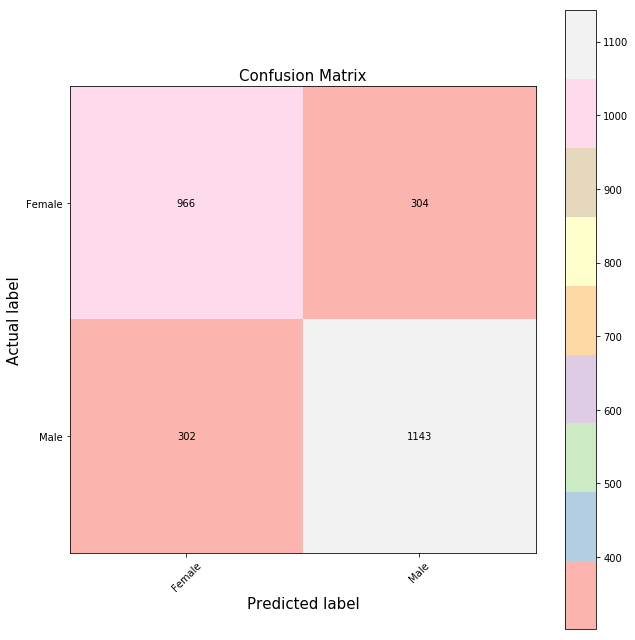

In [83]:
#Confusion Matrix for model of all athletes
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion Matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Female", "Male"], rotation=45, size = 10)
plt.yticks(tick_marks, ["Female", "Male"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')
plt.show()

In [84]:
data_aquatics = df[df['sport'] == "aquatics"]
data_athletics = df[df['sport'] == "athletics"]
data_basketball = df[df['sport'] == "basketball"]
data_golf = df[df['sport'] == "golf"]
data_gymnastics = df[df['sport'] == "gymnastics"]
data_volleyball = df[df['sport'] == "volleyball"]
data_weightlifting = df[df['sport'] == "weightlifting"]


In [85]:
data_gymnastics.head()

,sex,height,weight,sport,medals won
210,female,4.790026,77.16170,gymnastics,0
212,female,5.479003,127.86796,gymnastics,0
221,female,5.610236,101.41252,gymnastics,0
294,female,5.741470,119.04948,gymnastics,1
343,female,5.511811,105.82176,gymnastics,0


In [86]:
del data_gymnastics['sport']

In [87]:
data_new = pd.get_dummies(data_gymnastics.ix[:,0])
data_new.head()

/Users/amygeraghty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,female,male
210,1,0
212,1,0
221,1,0
294,1,0
343,1,0


In [88]:
data_final = pd.concat([data_new, data_gymnastics.ix[:,1:5]],axis=1)
data_final.head()

,female,male,height,weight,medals won
210,1,0,4.790026,77.16170,0
212,1,0,5.479003,127.86796,0
221,1,0,5.610236,101.41252,0
294,1,0,5.741470,119.04948,1
343,1,0,5.511811,105.82176,0


In [89]:

del data_final['medals won']
data_final.head()

,female,male,height,weight
210,1,0,4.790026,77.16170
212,1,0,5.479003,127.86796
221,1,0,5.610236,101.41252
294,1,0,5.741470,119.04948
343,1,0,5.511811,105.82176


In [90]:
data_final = data_final.drop('female', axis =1)


In [91]:

y = data_final['male']
y.head(15)

210    0
212    0
221    0
294    0
343    0
370    0
394    1
398    1
418    0
514    0
522    0
548    0
643    0
651    0
659    0
Name: male, dtype: uint8

In [92]:
X = data_final.drop('male', axis=1)
X.head()

,height,weight
210,4.790026,77.16170
212,5.479003,127.86796
221,5.610236,101.41252
294,5.741470,119.04948
343,5.511811,105.82176


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [94]:
from sklearn.linear_model import LogisticRegression
LogRegr = LogisticRegression()
LogRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
predictions = LogRegr.predict(X_test)

In [96]:
#Logistic regression score for all gymnasts
score = LogRegr.score(X_test, y_test)
print(score)

0.875


In [97]:
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[50  2]
 [ 8 20]]


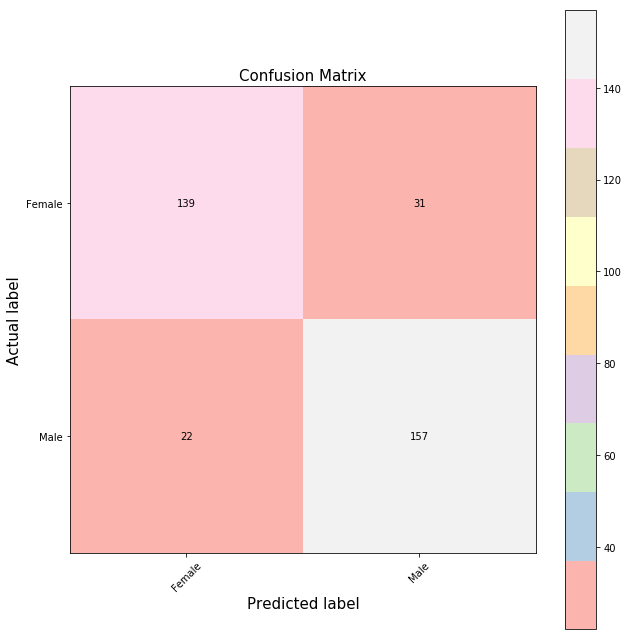

In [119]:
#Confusion matrix for gymnast model
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion Matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Female", "Male"], rotation=45, size = 10)
plt.yticks(tick_marks, ["Female", "Male"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')
plt.show()

In [98]:
data_aquatics.head()

,sex,height,weight,sport,medals won
7,male,6.332021,220.46200,aquatics,0
14,female,5.839895,149.91416,aquatics,2
26,male,5.938320,158.73264,aquatics,0
45,male,6.233596,198.41580,aquatics,0
64,female,5.446194,134.48182,aquatics,0


In [99]:
del data_aquatics['sport']

In [100]:
data_new = pd.get_dummies(data_aquatics.ix[:,0])
data_new.head()

/Users/amygeraghty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,female,male
7,0,1
14,1,0
26,0,1
45,0,1
64,1,0


In [101]:
data_final = pd.concat([data_new, data_aquatics.ix[:,1:5]],axis=1)
data_final.head()

,female,male,height,weight,medals won
7,0,1,6.332021,220.46200,0
14,1,0,5.839895,149.91416,2
26,0,1,5.938320,158.73264,0
45,0,1,6.233596,198.41580,0
64,1,0,5.446194,134.48182,0


In [102]:
del data_final['medals won']
data_final.head()

,female,male,height,weight
7,0,1,6.332021,220.46200
14,1,0,5.839895,149.91416
26,0,1,5.938320,158.73264
45,0,1,6.233596,198.41580
64,1,0,5.446194,134.48182


In [103]:
data_final = data_final.drop('female', axis =1)

In [104]:

y = data_final['male']
y.head(15)

7      1
14     0
26     1
45     1
64     0
75     1
85     1
87     1
89     1
114    1
137    0
142    0
147    0
166    1
172    1
Name: male, dtype: uint8

In [105]:
X = data_final.drop('male', axis=1)
X.head()

,height,weight
7,6.332021,220.46200
14,5.839895,149.91416
26,5.938320,158.73264
45,6.233596,198.41580
64,5.446194,134.48182


In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [107]:
from sklearn.linear_model import LogisticRegression
LogRegr = LogisticRegression()


In [108]:
from sklearn.linear_model import LogisticRegression
LogRegr = LogisticRegression()
LogRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [109]:
predictions = LogRegr.predict(X_test)

In [110]:
#Logistic Regression Score for Swimmers
score = LogRegr.score(X_test, y_test)
print(score)

0.848137535817


In [111]:
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[139  31]
 [ 22 157]]


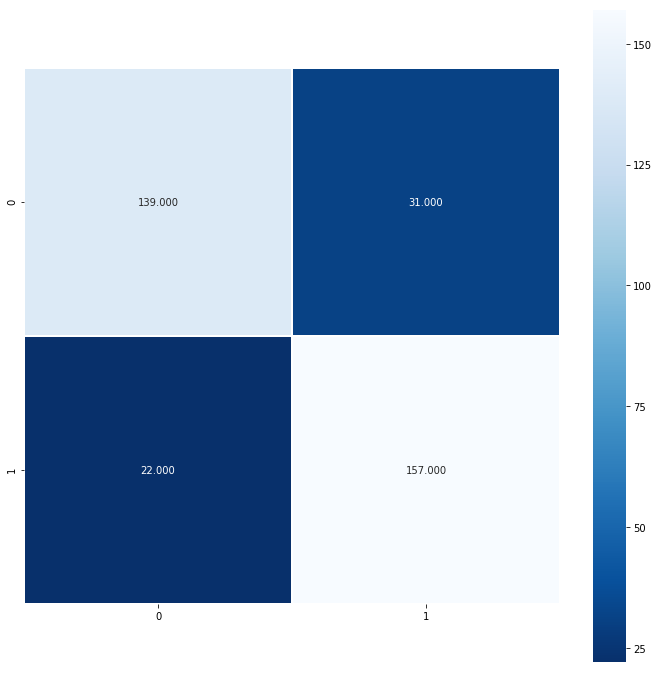

In [112]:

import numpy as np
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize = (12,12))
sns.heatmap(cm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = 'Blues_r', ax = ax)
plt.show()

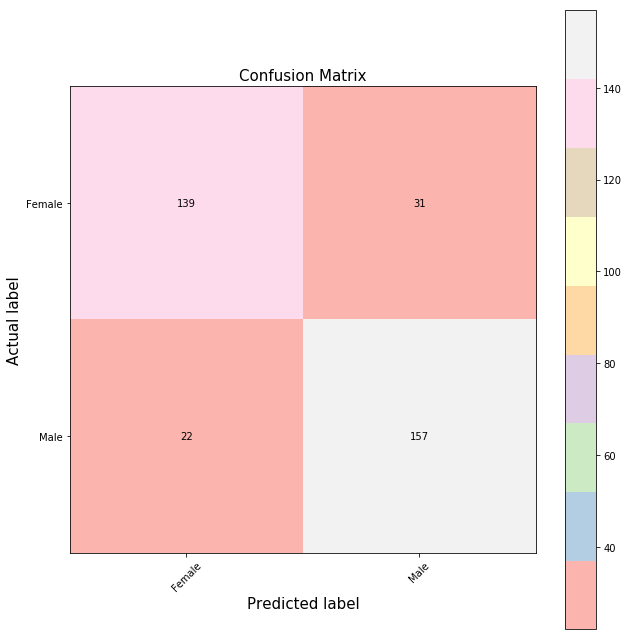

In [118]:
#Confusion Matrix for Swimmers
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion Matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Female", "Male"], rotation=45, size = 10)
plt.yticks(tick_marks, ["Female", "Male"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')
plt.show()